In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

img1_org = img.imread('1_1(1).gif',0) #reading the image
img2_org = img.imread('1_2(1).gif',0) 
img3_org = img.imread('1_3(1).gif',0)
img4_org = img.imread('1_4(1).gif',0)
img5_org = img.imread('1_5(1).gif',0)
img6_org = img.imread('1_6(1).gif',0)

img1=img1_org[:,:,0] #picking 'B' matrix of RGB of the provided image
img2=img2_org[:,:,0]
img3=img3_org[:,:,0]
img4=img4_org[:,:,0]
img5=img5_org[:,:,0]
img6=img6_org[:,:,0]

img1=(img1.reshape(1,img1.shape[0]*img1.shape[1])) #reshaping the matrix from PxP to 1xP^2
img2=(img2.reshape(1,img2.shape[0]*img2.shape[1]))
img3=(img3.reshape(1,img3.shape[0]*img3.shape[1]))
img4=(img4.reshape(1,img4.shape[0]*img4.shape[1]))
img5=(img5.reshape(1,img5.shape[0]*img5.shape[1]))
img6=(img6.reshape(1,img6.shape[0]*img6.shape[1]))

I1=np.append(img1,img2,axis=0)
I2=np.append(I1,img3,axis=0)
I3=np.append(I2,img4,axis=0)
I4=np.append(I3,img5,axis=0)
X2=np.append(I4,img6,axis=0)
X=X2.T

centered_matrix = X - np.mean(X , axis = 0)
X1=(1/2500)*np.dot(X,X.T)
#m=centered_matrix.shape[0]
#X1=1/m*(np.matmul(centered_matrix,centered_matrix.T))
eig_val, eig_vec = np.linalg.eigh(X1)
index_eigen_values_index = np.argsort(eig_val)#sorting in ascending order and returning the indexes 
index_eigen_sorted = index_eigen_values_index[::-1] # sorting in descending order
eig_vec = eig_vec[:,index_eigen_sorted] # rearranigng the eigen vectors in the same order as eigen values
eig_val = eig_val[index_eigen_sorted] # rearranging the eigen values matrix in the same order as eigen values arranged

k =2400# this can be changed by must be less than the p value or less than 
p = len(eig_vec)
if k <p and k >0:
    eig_vec = eig_vec[:, range(k)] # taking eig_vec uptil the k value is defined ... this is the ''compressed version''

sigma = np.matmul(eig_vec.T,centered_matrix) 
recon = np.matmul(eig_vec,sigma) + np.mean(X,axis=0)
recon_img_mat = (np.uint8(np.absolute(recon))).T# for avoid complex eigen values, thus obtaining the reconstructed eigen matrix


In [136]:
eig_vec.T.shape,eig_vec.shape,centered_matrix.shape,X.shape

((2490, 2500), (2500, 2490), (2500, 6), (2500, 6))

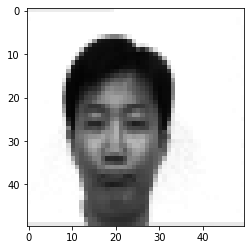

In [18]:
plt.imshow(img1_org,'gray')

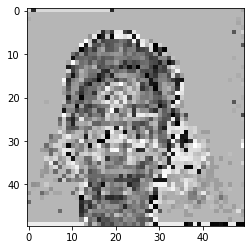

In [11]:
plt.imshow(recon_img_mat[0].reshape(50,50),'gray')#-----------------------when K=2490

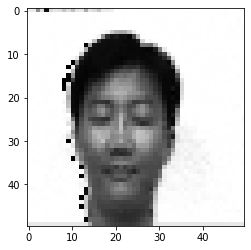

In [143]:
plt.imshow(recon_img_mat[1].reshape(50,50),'gray')#-----------------------when K=2490

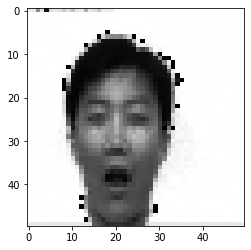

In [144]:
plt.imshow(recon_img_mat[2].reshape(50,50),'gray')#-----------------------when K=2490

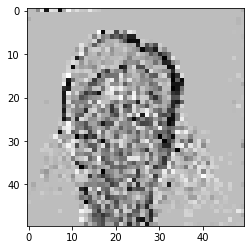

In [146]:
plt.imshow(recon_img_mat[1].reshape(50,50),'gray')#-----------------------when K=400

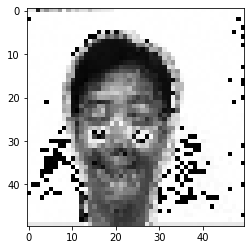

In [68]:
plt.imshow(recon_img_mat[2].reshape(50,50),'gray')#-----------------------when K=400

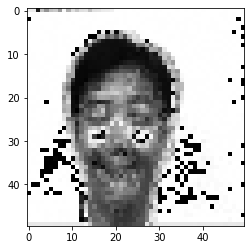

In [69]:
plt.imshow(recon_img_mat[3].reshape(50,50),'gray') #-----------------------when K=400

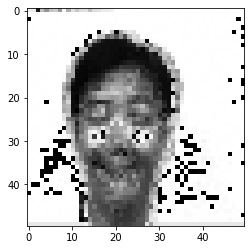

In [70]:
plt.imshow(recon_img_mat[4].reshape(50,50),'gray')#-----------------------when K=400

In [63]:
recon_img_mat.shape,np.argmin(sum(X.T[1]-recon_img_mat[1])),centered_matrix.shape

((6, 2500), 0, (2500, 6))

Text(0, 0.5, 'K_value')

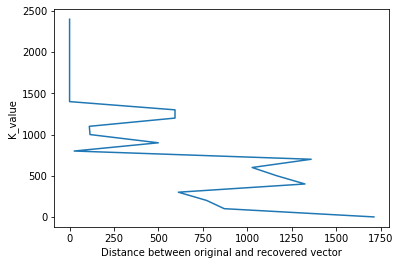

In [140]:
k1=1
var=[]
k_value=[]
from copy import deepcopy
eig_val, eig_vec_2 = np.linalg.eigh(X1)

while(k1<2500 and k1>0):
    sumation=0
    eig_vec_1=eig_vec_2
    eig_vec_1 = eig_vec_1[:, range(k1)]
    sigma = np.matmul(eig_vec_1.T,centered_matrix) 
    recon = np.matmul(eig_vec_1,sigma) + np.mean(X,axis=0)
    recon_img_mat = (np.uint8(np.absolute(recon))).T
    for i in range (centered_matrix.shape[1]):
        sumation+=(X.T[i]-recon_img_mat[i])**2 # Minimum Distance Calculation 
    var.append(np.argmin(sumation))
    k_value.append(k1)
    k1+=100 
    
plt.figure()
plt.plot(var,k_value)
plt.xlabel('Distance between original and recovered vector') 
plt.ylabel('K_value') 

In [78]:
'''
k1=1
var=[]
k_value=[]
from copy import deepcopy
eig_val, eig_vec_2 = np.linalg.eigh(X1)

while(k1<2500 and k1>0):
    sumation=0
    eig_vec_1=eig_vec_2
    eig_vec_1 = eig_vec_1[:, range(k1)]
    sigma = np.matmul(eig_vec_1.T,centered_matrix) 
    recon = np.matmul(eig_vec_1,sigma) + np.mean(X,axis=0)
    recon_img_mat = (np.uint8(np.absolute(recon))).T
    #for j in range (centered_matrix.shape[1]):
    sumation=abs(X.T-recon_img_mat)
    var.append(np.argmin(sumation))
    k_value.append(k1)
    k1+=100 
    
plt.figure()
plt.plot(var,k_value)


'''

'\nk1=1\nvar=[]\nk_value=[]\nfrom copy import deepcopy\neig_val, eig_vec_2 = np.linalg.eigh(X1)\n\nwhile(k1<2500 and k1>0):\n    sumation=0\n    eig_vec_1=eig_vec_2\n    eig_vec_1 = eig_vec_1[:, range(k1)]\n    sigma = np.matmul(eig_vec_1.T,centered_matrix) \n    recon = np.matmul(eig_vec_1,sigma) + np.mean(X,axis=0)\n    recon_img_mat = (np.uint8(np.absolute(recon))).T\n    #for j in range (centered_matrix.shape[1]):\n    sumation=abs(X.T-recon_img_mat)\n    var.append(np.argmin(sumation))\n    k_value.append(k1)\n    k1+=100 \n    \nplt.figure()\nplt.plot(var,k_value)\n\n\n'

In [79]:
X.shape

(2500, 6)

In [111]:
made_cov=np.zeros((X.shape[0],X.shape[0]))
X.T.mean()

190.14213333333333

In [105]:
X.T[:,0],X.T.shape

(array([236, 236, 236, 236, 236, 236], dtype=uint8), (6, 2500))

In [109]:
made_cov[1,1]=5
int(made_cov[1,1])

5

In [124]:
made_cov

array([[    0.        ,     0.        ,     0.        , ...,
            0.        , -2238.4376    , -2239.33333333],
       [    0.        ,     0.        ,     0.        , ...,
            0.        , -3691.18960001, -3692.66666667],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  1669.33199998,  1669.99999998],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [122]:
summation=0
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        summation+=(1*X.shape[0])*(X.T[i]-X.T.mean())()
    print(sum(summation))
   

TypeError: 'numpy.ndarray' object is not callable